# CPSC 601 Connectomics Fall 2024: Exercise 1

Complete the below exercises and hand-in to the Dropbox folder by 23:59pm Friday 27th September. Please submit both a pdf format (with all your code clearly visible) and an ipynb format. 

You will not be graded on code 'quality', optimization, etc. You will be graded on: does it work properly, do you understand what it means.

You may use any code from class and refer to any outside resources (excepting AI tools), as long as you reference them appropriately. 

Interpretation is a fundamental part of analysis - nowhere should you just provide a number or distibution without commenting on what you can learn from it.

You have been given a weighted undirected network representation of the C. elegans nervous system. The nodes are neurons, and the edges correspond to synaptic connections between two neurons. Weights correspond to number of synapses, and the direction of connection is ignored. In this exercise you will explore the three central measures in network science - degree distribution, clustering, and path length - and consider their extensions to weighted networks.

__Matthew McConnell - 30094710. All citations (when necessary) are provided in-line.__

## Q1: Degree, weight, and strength (15 marks)
Plot:
- (a) The degree distibution;
- (b) The edge weight distribution;
- (c) The strength distribution. 

What do you observe? Is this surprising or expected?

In [95]:
!pip install bctpy
!pip install numpy
!pip install networkx
!pip install matplotlib

In [96]:
# Imports
import numpy as np
import networkx as nx
import bct
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

# Default matplotlib things
# change defaults to be less ugly
mpl.rc('xtick', labelsize=14, color="#222222") 
mpl.rc('ytick', labelsize=14, color="#222222") 
mpl.rc('font', **{'family':'sans-serif','sans-serif':['Arial']})
mpl.rc('font', size=16)
mpl.rc('xtick.major', size=6, width=1)
mpl.rc('xtick.minor', size=3, width=1)
mpl.rc('ytick.major', size=6, width=1)
mpl.rc('ytick.minor', size=3, width=1)
mpl.rc('axes', linewidth=1, edgecolor="#222222", labelcolor="#222222")
mpl.rc('text', usetex=False, color="#222222")

In [97]:
#https://www.geeksforgeeks.org/how-to-read-dictionary-from-file-in-python/
import ast
# Create our graph, load it in
G = nx.Graph()

# Load it in the python way
f = open("celegans_wu", 'r')

for line in f:
    # print(line)
    split = line.strip().split(' ', 2)
    # print(split)
    node1 = int(split[0])
    node2 = int(split[1])
    weight = ast.literal_eval(split[2])
    weight_for_graph = next(iter(weight.values()))
    # print(weight_for_graph)
    
    G.add_edge(node1, node2, weight=weight_for_graph)
    
    # break

# Alternative method
G1 = nx.read_edgelist('./celegans_wu', comments='#',
                     create_using=nx.Graph(), 
                     delimiter=' ', 
                     nodetype=int, 
                     encoding='utf-8')

# print(G1[0])

__Disclaimer__

Below I have presented some information about the network for my own information. I was playing around with different networkx functions, and ways we can interact with our graph objects. The analysis will follow at the end of each question, so these can be relatively skipped!

In [98]:
# Sanity checks

# number of nodes
print(G.number_of_nodes())

# more pythonic way
print(len(G))

# number of edges
print(G.number_of_edges())

# better
print(G.size())

# how to do string formatting
print("G has {0} nodes and {1} edges.".format(len(G), G.size()))

279
279
2287
2287
G has 279 nodes and 2287 edges.


In [99]:
# Degree Information

N = len(G)
L = G.size()
degrees = [G.degree(node) for node in G]
kmin = min(degrees)
kmax = max(degrees)


G_array = nx.to_numpy_array(G)
bct_degrees = bct.degrees_und(G_array)

# for a directed graph, the syntax is:
# in_deg, out_deg, tot_deg = bct.degrees_dir(G_array)

bct_kmin = min(bct_degrees)
bct_kmax = max(bct_degrees)

bct_N = len(G_array)
bct_L = np.sum(G_array)/2 

print("Number of nodes: ", bct_N)
print("Number of edges: ", bct_L)
print()
print("Average degree: ", 2*bct_L/bct_N)
print("Average degree (alternate calculation)", np.mean(bct_degrees))
print()
print("Minimum degree: ", bct_kmin)
print("Maximum degree: ", bct_kmax)

Number of nodes:  279
Number of edges:  7281.0

Average degree:  52.193548387096776
Average degree (alternate calculation) 16.39426523297491

Minimum degree:  2.0
Maximum degree:  93.0


## Degree Distribution Plots ##

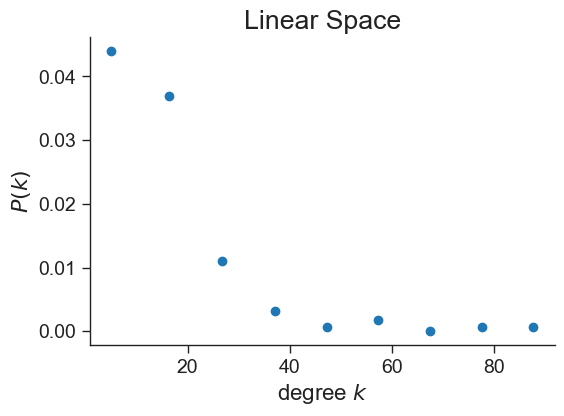

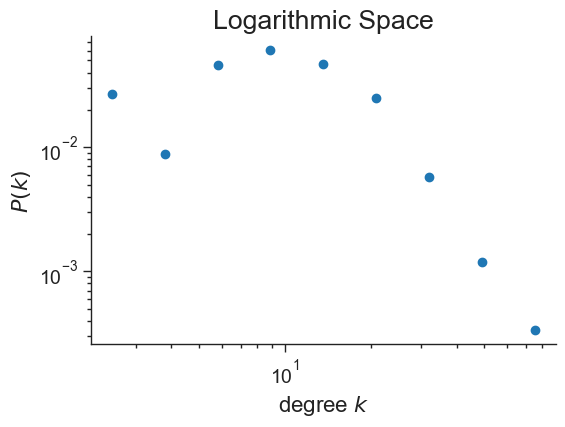

In [100]:

# First, let's do it linearly 
kmin = min(degrees)
kmax = max(degrees)

# Get 20 logarithmically spaced bins between kmin and kmax
bin_edges = np.linspace(kmin, kmax, num=10)

# histogram the data into these bins
density, _ = np.histogram(degrees, bins=bin_edges, density=True)
fig = plt.figure(figsize=(6,4))

# "x" should be midpoint (IN LOG SPACE) of each bin
log_be = np.log10(bin_edges)
x = 10**((log_be[1:] + log_be[:-1])/2)

plt.plot(x, density, marker='o', linestyle='none')
plt.xlabel(r"degree $k$", fontsize=16)
plt.ylabel(r"$P(k)$", fontsize=16)

# remove right and top boundaries because they're ugly
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.set_title("Linear Space")
# Show the plot
plt.show()

# LOGARITHMICALLY

# Get 10 logarithmically spaced bins between kmin and kmax
bin_edges = np.logspace(np.log10(kmin), np.log10(kmax), num=10)

# histogram the data into these bins
density, _ = np.histogram(degrees, bins=bin_edges, density=True)

fig = plt.figure(figsize=(6,4))

# "x" should be midpoint (IN LOG SPACE) of each bin
log_be = np.log10(bin_edges)
x = 10**((log_be[1:] + log_be[:-1])/2)

plt.loglog(x, density, marker='o', linestyle='none')
plt.xlabel(r"degree $k$", fontsize=16)
plt.ylabel(r"$P(k)$", fontsize=16)

# remove right and top boundaries because they're ugly
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.set_title("Logarithmic Space")
# Show the plot
plt.show()



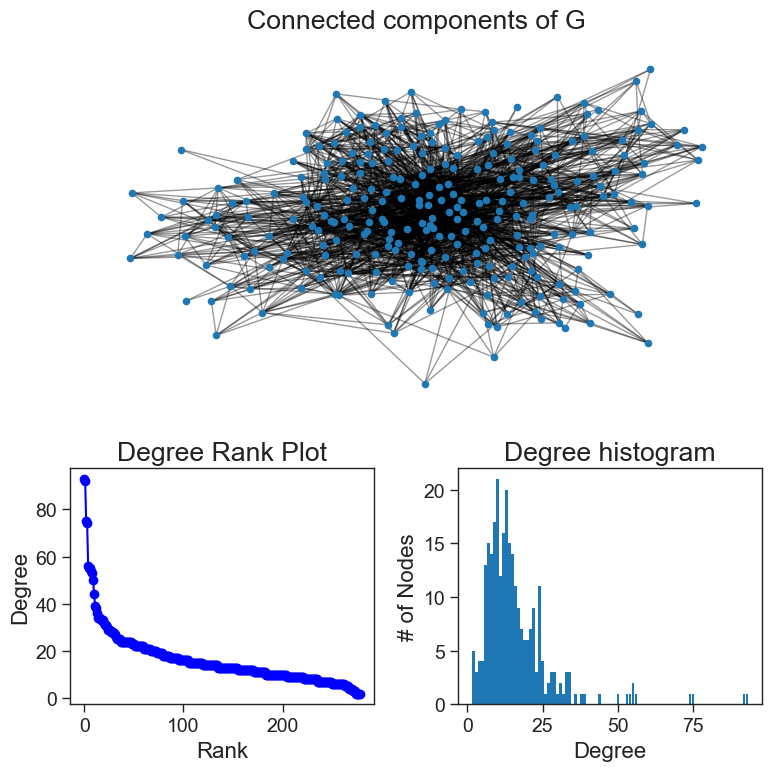

In [101]:
# https://networkx.org/documentation/stable/auto_examples/drawing/plot_degree.html
# Alternative method
degree_sequence = sorted((d for n, d in G.degree()), reverse=True)
dmax = max(degree_sequence)

fig = plt.figure("Degree of a random graph", figsize=(8, 8))
# Create a gridspec for adding subplots of different sizes
axgrid = fig.add_gridspec(5, 4)

ax0 = fig.add_subplot(axgrid[0:3, :])
Gcc = G.subgraph(sorted(nx.connected_components(G), key=len, reverse=True)[0])
pos = nx.spring_layout(Gcc, seed=10396953)
nx.draw_networkx_nodes(Gcc, pos, ax=ax0, node_size=20)
nx.draw_networkx_edges(Gcc, pos, ax=ax0, alpha=0.4)
ax0.set_title("Connected components of G")
ax0.set_axis_off()

ax1 = fig.add_subplot(axgrid[3:, :2])
ax1.plot(degree_sequence, "b-", marker="o")
ax1.set_title("Degree Rank Plot")
ax1.set_ylabel("Degree")
ax1.set_xlabel("Rank")

ax2 = fig.add_subplot(axgrid[3:, 2:])
ax2.bar(*np.unique(degree_sequence, return_counts=True))
ax2.set_title("Degree histogram")
ax2.set_xlabel("Degree")
ax2.set_ylabel("# of Nodes")

fig.tight_layout()
plt.show()

Please note, the above graphic is not inherently important to our discussion of the C. elegans network. I was exploring the documentation regarding networkx, and various ways of plotting, and I wanted to see what examples they had available. I think the best graph from the above three is the connected components section, as it allows us to see a visualization of the graph as a whole. However, they do provide some insight into potential hubs, and how this analysis makes sense for a real-life nervous system. More will follow in terms of analysis, backed up by the particular distribution plots!

## Edge Weight Distribution Plots ##

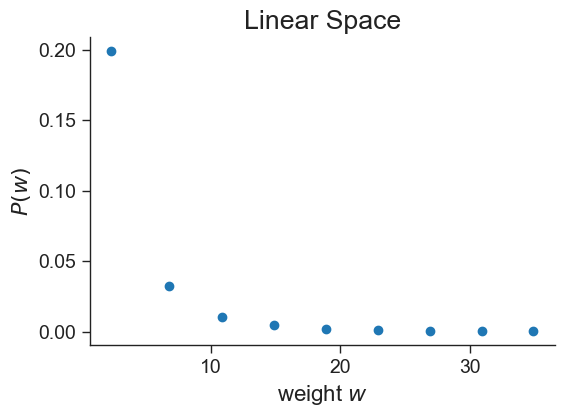

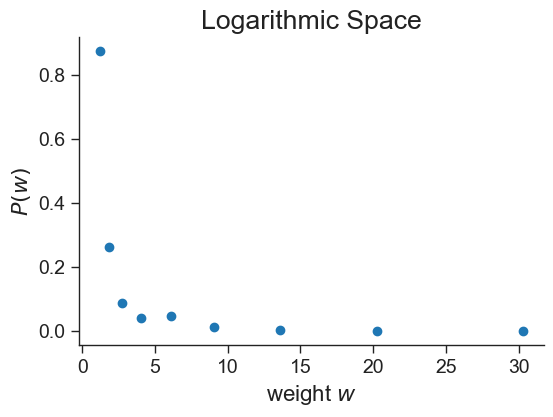

In [102]:
# Probability that a randomly chosen link has weight w
# Let's use a histogram and a regular plot

# First, let's do it linearly 
edge_weights = [G[u][v]['weight'] for u, v in G.edges()]
# print(edge_weights)

kmin = min(edge_weights)
kmax = max(edge_weights)

# Get 20 logarithmically spaced bins between kmin and kmax
bin_edges = np.linspace(kmin, kmax, num=10)

# histogram the data into these bins
density, _ = np.histogram(edge_weights, bins=bin_edges, density=True)
fig = plt.figure(figsize=(6,4))

# "x" should be midpoint (IN LOG SPACE) of each bin
log_be = np.log10(bin_edges)
x = 10**((log_be[1:] + log_be[:-1])/2)

plt.plot(x, density, marker='o', linestyle='none')
plt.xlabel(r"weight $w$", fontsize=16)
plt.ylabel(r"$P(w)$", fontsize=16)

# remove right and top boundaries because they're ugly
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.set_title("Linear Space")
# Show the plot
plt.show()


bin_edges = np.logspace(np.log10(kmin), np.log10(kmax), num=10)

# histogram the data into these bins
density, _ = np.histogram(edge_weights, bins=bin_edges, density=True)

fig = plt.figure(figsize=(6,4))

# "x" should be midpoint (IN LOG SPACE) of each bin
log_be = np.log10(bin_edges)
x = 10**((log_be[1:] + log_be[:-1])/2)

plt.plot(x, density, marker='o', linestyle='none')
plt.xlabel(r"weight $w$", fontsize=16)
plt.ylabel(r"$P(w)$", fontsize=16)

# remove right and top boundaries because they're ugly
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.set_title("Logarithmic Space")

# Show the plot
plt.show()



## Strength Distribution Plots ##

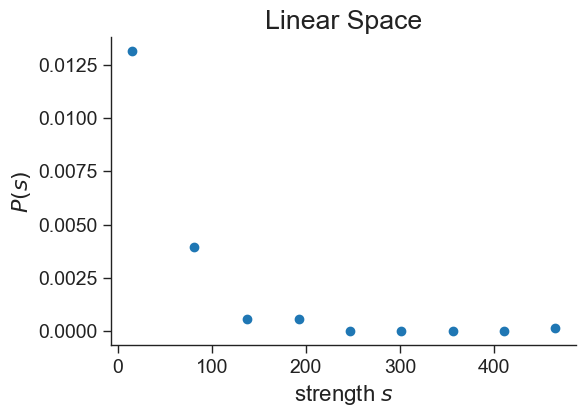

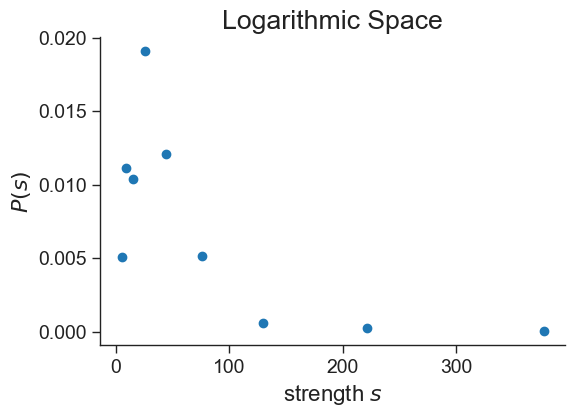

In [103]:
# Probability that a randomly chosen node has strength s
# https://networkx.org/documentation/stable/reference/classes/generated/networkx.Graph.degree.html
strengths = []
for node, strength in dict(G.degree(weight='weight')).items():
    strengths.append(strength)

# print(edge_weights)

kmin = min(strengths)
kmax = max(strengths)

# Get 20 logarithmically spaced bins between kmin and kmax
bin_edges = np.linspace(kmin, kmax, num=10)

# histogram the data into these bins
density, _ = np.histogram(strengths, bins=bin_edges, density=True)
fig = plt.figure(figsize=(6,4))

# "x" should be midpoint (IN LOG SPACE) of each bin
log_be = np.log10(bin_edges)
x = 10**((log_be[1:] + log_be[:-1])/2)

plt.plot(x, density, marker='o', linestyle='none')
plt.xlabel(r"strength $s$", fontsize=16)
plt.ylabel(r"$P(s)$", fontsize=16)

# remove right and top boundaries because they're ugly
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.set_title("Linear Space")
# Show the plot
plt.show()


bin_edges = np.logspace(np.log10(kmin), np.log10(kmax), num=10)

# histogram the data into these bins
density, _ = np.histogram(strengths, bins=bin_edges, density=True)

fig = plt.figure(figsize=(6,4))

# "x" should be midpoint (IN LOG SPACE) of each bin
log_be = np.log10(bin_edges)
x = 10**((log_be[1:] + log_be[:-1])/2)

plt.plot(x, density, marker='o', linestyle='none')
plt.xlabel(r"strength $s$", fontsize=16)
plt.ylabel(r"$P(s)$", fontsize=16)

# remove right and top boundaries because they're ugly
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.set_title("Logarithmic Space")

# Show the plot
plt.show()



__What do we observe? Is this surprising, or expected?__

We know that the C. elegans network provided to us is an undirected, weighted graph, with many nodes and links. We know that the average degree relates to the number of nodes in the graph, as well as the number of links. However, for these initial graphs we are primarily concerned with the distribution of Degree, Weights and Strength across our C. elegans network.

_Degree Distribution_:

We know that the degree distribution of a particular graph is P(k): the probability that a randomly chosen node has degree k. In other words, we can gain some insight into the number of connections that a particular node might have to other nodes, when we consider the distribution across the entire network. We know from class, that a majority of real-world networks are highly "right-skewed", or fat tailed, particular in the case for strength and weight distributions.

As far as the degree distributions for the C. elegans network, I have decided to plot it both in linear as well as exponential space. This gives us a better idea for analysis regarding degree distribution. We could argue that the C. elegans degree distribution follows similar suit to the power law, where we mave many nodes with only a few links, as well as a few hubs with a large number of links. This is intuitive from the graph, as we see a higher probability for lower degrees, and a lower probability for higher degrees. This insight is easily viewable when considering the linear space representation. We can expect many real-life networks to follow similar properties when discussing degree distribution, that we have a large number of nodes with fewer connections, and a small number of nodes with large connections. This leads to the idea that we have a few hubs at the higher end of the degree scale. A limited number of nodes with high degrees might indicate that there are particular regions or areas in the C. elegans network that play a crucial role in maintaining the overall structure, function, information flow, etc... in our network. This makes sense when we consider a real-world nervous system, as we want to be able to facilitate efficient information flow, which might be important when quick reactions are required. However, degree distribution is not the only metric to consider, so we need to take this with a grain of salt. 

_Edge-weight Distribution_:

We know that the edge weight distribution of a particular graph is P(w): the probability that a randomly chosen link has weight w. In general, we know that higher weights often represent some type of higher "cost" from travelling between nodes, whether that be distances or some other value. Higher weights can also represent higher strength of connections or interactions between nodes, depending on the data being considered. Plotting the edge-weight distribution helps us understand how interaction strengths are distributed throughout our network. 

When we consider our edge-weight plots of the C. elegans network, we can see that it also follows in similar suit to a power law, where the majority of nodes have "weak" weights or connections, and a few have relatively strong ones. We can clearly see that the edge-weight distribution is also fat-tailed, which is expected as most real systems we know that P(w) is likely to be fat tailed. This further connects to that idea of hubs, where we have particular regions of interest that will have different edge-weights than the rest. Since we know that these edge-weights represent the number of synapses, it follows suit that our hubs will likely have many connections (as mentioned above), as well as have a large number of synapses surrounding them! A greater weight means a greater number of synapses, so the importance of these hubs, with a greater number and stronger connections, shines through. This also leads us to understand that higher edge-weights are not an inherently bad thing, like they might be if they were the "cost" to travel between nodes, like distance. Typically when we see high-edge weights in a graph, that does not facillitate shortest paths, or quick information traversal. It's important to keep in mind that the high edge-weights are actually extremely beneficial, and the lower-edge weights are "less" important.  

_Strength Distribution_: 

We know that the strength distribution of a particular graph is P(s): the probability that a randomly chosen node has strength s. Furthermore, we know that strength in terms of network science tells us how strongly a particular node is directly connected to other nodes in the network. Or in other words, a weighted degree. Plotting this strength distribution tells us how important or influential particular nodes are, considering both the number of connections as well as the weights of these connections. 

Again, when we are considering our strength distribution plots of the C. elegans network, we can see that it also follows suit to the power law, where the majority of nodes have "low" strength, and a few have relatively strong ones. We can clearly see that the strength-distribution is also fat-tailed, which is expected as most real systems we know that P(s) is likely to be fat tailed. Again, this further connects to the idea of hubs, where we have particular regions of interest that will have different strengths than the rest. It follows suit that we will have these hubs with high strength, as we know that the number of connections as well as the number of synapses will be greater in these hub areas. 

Across all three of our common network analysis distributions, we see relatively expected results for a real-world nervous system. We explore the idea of hubs, where large number of synapses and connections make up important regions of the network. Furthermore, we can start to understand that higher-edge weights and strengths of nodes indicate beneficial properties or regions of the network.


## Q2: Binary metrics (30 marks)

In this question, ignore the weights on the edges and treat the network as if it were binary. 

Calculate (a) the average clustering coefficient; and (b) the average shortest path length for the binarized network representing the C. elegans nervous system. (4 marks)

In [104]:
# First, read in graph again, disregard weights

# Create our graph, load it in
UW_G = nx.Graph()

# Load it in the python way
f = open("celegans_wu", 'r')
for line in f:
    # print(line)
    split = line.strip().split(' ', 2)
    # print(split)
    node1 = int(split[0])
    node2 = int(split[1])
   
    UW_G.add_edge(node1, node2)
    
    
# Might be possible to remove weights from G, instead of reading in, but this seems easier

In [105]:
# A) average clustering coeffecient
print(f"Average Clustering Coefficient: {nx.average_clustering(UW_G)}")

# B) average shortest path length 
print(f"Average Shortest Path Length: {nx.average_shortest_path_length(UW_G)}")



Average Clustering Coefficient: 0.3371339990890197
Average Shortest Path Length: 2.435625692993992


Can we say anything about these numbers? Not really - we need a reference system to compare to. Generate an ensemble of 100 comparable random ER graphs, and calculate both the average clustering and average shortest path length. (4 marks)

__ER GRAPHS__

In [106]:
# More pythonic way
import itertools as it
import random

# More pythonic way from example exercise notebook
def erdos_renyi(n, p):
    G = nx.Graph()
    nodes = range(n)
    G.add_nodes_from(nodes)
    G.add_edges_from(edge for edge in it.combinations(nodes, 2) if np.random.uniform() < p)
    return G

graphs = []
print("Nodes: ", UW_G.number_of_nodes())
print("Edges: ", UW_G.number_of_edges())

'''
From textbook:
L = p * (N (N - 1) / 2)
'''

p = 2 * UW_G.number_of_edges() / (UW_G.number_of_nodes() * (UW_G.number_of_nodes() - 1))

print(f"P: {p}")



for i in range(100):
    # graph = erdos_renyi(random.randrange(250, 300), 1e-2)
    # Can use networkx directly
    
    # (nodes, probability for edge creation, seed, directed) 
    graph = nx.erdos_renyi_graph(279, p=p, directed=False) # defaults to false
    
    graphs.append(graph)
    
er_avg_clustering_coefficients = []
er_avg_shortest_path_lengths = []

for g in graphs:
    er_avg_clustering_coefficients.append(nx.average_clustering(g))
    if (nx.is_connected(g)): # can only get a shortest path if the network is connected!!
        er_avg_shortest_path_lengths.append(nx.average_shortest_path_length(g))

# avg_clustering_coefficients
# print(er_avg_clustering_coefficients)
# print(er_avg_shortest_path_lengths)    

# print avgs of lists
# print(f"Average clustering of 100 random graphs: {sum(avg_clustering_coefficients) / len(avg_clustering_coefficients)}")
# print(f"Average shortest path of 100 random graphs: {sum(avg_shortest_path_lengths) / len(avg_shortest_path_lengths)}")
# print() 
# print()
# print(f"Average clustering of 100 random graphs: {np.mean(er_avg_clustering_coefficients)}")
# print(f"Average shortest path of 100 random graphs: {np.mean(er_avg_shortest_path_lengths)}")


Nodes:  279
Edges:  2287
P: 0.05897217709703205


Now, generate an ensemble of 100 random graphs through degree-preserving (DP) double edge swaps, and calculate both the average clustering and average shortest path length. (6 marks)

__DP-Swap GRAPHS__

In [107]:
import copy

# Networkx has a `double_edge_swap` method, that swaps two edges in the graph while keeping (preserving) the node degrees
# https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.swap.double_edge_swap.html

graphs = []

print(UW_G.number_of_edges())
# Generate 100 graphs
for i in range(100):
    graph = copy.deepcopy(UW_G)
    graph = nx.double_edge_swap(graph, nswap=graph.number_of_edges() * 20, max_tries= graph.number_of_edges() * 200)
    # graph = nx.double_edge_swap(graph, nswap=10, max_tries=5000)
    graphs.append(graph)
    

print(nx.average_clustering(UW_G))

# Same collection and analysis as above
dp_avg_clustering_coefficients = []
dp_avg_shortest_path_lengths = []

for g in graphs:
    dp_avg_clustering_coefficients.append(nx.average_clustering(g))
 
    if (nx.is_connected(g)):
        dp_avg_shortest_path_lengths.append(nx.average_shortest_path_length(g))

# avg_clustering_coefficients
# print(dp_avg_clustering_coefficients)
# print(dp_avg_shortest_path_lengths)    

# print avgs of lists
# print(f"Average clustering of 100 random graphs: {sum(avg_clustering_coefficients) / len(avg_clustering_coefficients)}")
# print(f"Average shortest path of 100 random graphs: {sum(avg_shortest_path_lengths) / len(avg_shortest_path_lengths)}")
# print()
# print()
# print(f"Average clustering of 100 random graphs: {np.mean(dp_avg_clustering_coefficients)}")
# print(f"Average shortest path of 100 random graphs: {np.mean(dp_avg_shortest_path_lengths)}")



2287
0.3371339990890197


Show your results as box plots - one for average clustering, and one for the average path length. Include the ER graphs, the DP graphs, and points for the real values observed in the C. elegans network. (10 marks)

C:\Users\mattm\AppData\Local\Temp\ipykernel_31660\449779356.py:15: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax[0].boxplot(clustering_data_combined, labels=["ER graphs", "DP graphs"])
C:\Users\mattm\AppData\Local\Temp\ipykernel_31660\449779356.py:23: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax[1].boxplot(path_data_combined, labels=["ER graphs", "DP graphs"])


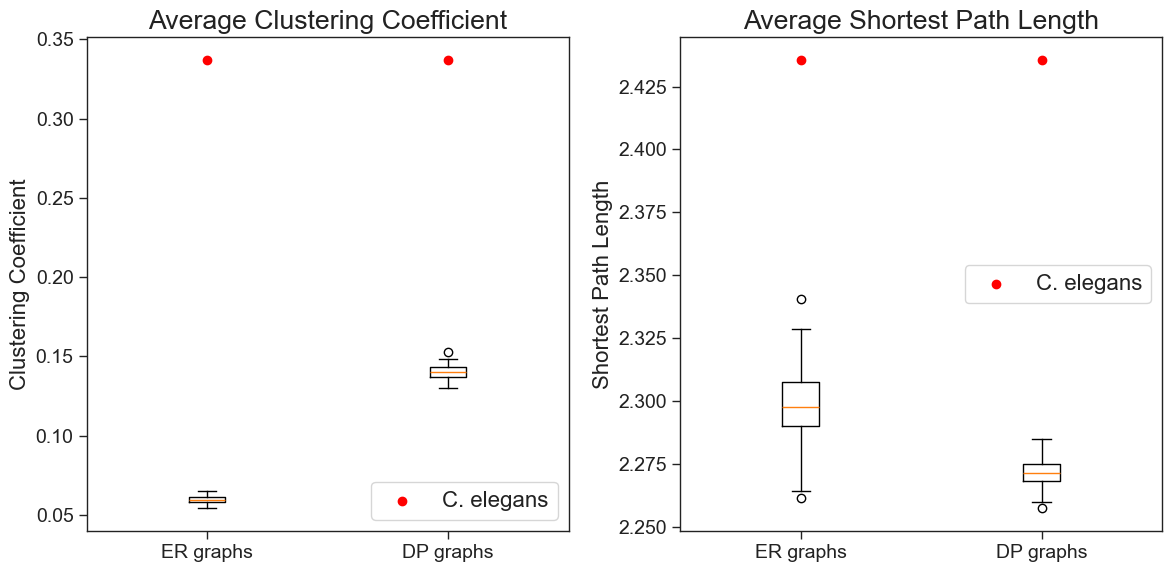

In [108]:
# These don't seem like the best choices for null models for the C. elegans network - which is okay!

# First, average clustering and path length for the REAL values in C. elegans (going to be one data point, let's plot as a scatter)
real_clustering = nx.average_clustering(UW_G)
real_path_length = nx.average_shortest_path_length(UW_G)


clustering_data_combined = [er_avg_clustering_coefficients, dp_avg_clustering_coefficients]
path_data_combined = [er_avg_shortest_path_lengths, dp_avg_shortest_path_lengths]

# Create box plots for average clustering coefficient
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Box plot for average clustering coefficient
ax[0].boxplot(clustering_data_combined, labels=["ER graphs", "DP graphs"])
ax[0].scatter(1, real_clustering, color='red', label='C. elegans', zorder=3) # real clustering
ax[0].scatter(2, real_clustering, color='red', zorder=3) # real clustering
ax[0].set_title("Average Clustering Coefficient")
ax[0].set_ylabel("Clustering Coefficient")
ax[0].legend()

# Box plot for average shortest path length
ax[1].boxplot(path_data_combined, labels=["ER graphs", "DP graphs"])
ax[1].scatter(1, real_path_length, color='red', label='C. elegans', zorder=3) # real path length
ax[1].scatter(2, real_path_length, color='red', zorder=3) # real path length
ax[1].set_title("Average Shortest Path Length")
ax[1].set_ylabel("Shortest Path Length")
ax[1].legend()

# Show the plots
plt.tight_layout()
plt.show()

__Please note, the above graph includes the actual value of the C.elegans network, whereas the below ones will include just the null models in isolation. This will be touched on in the corresponding analysis section...__

C:\Users\mattm\AppData\Local\Temp\ipykernel_31660\867363067.py:10: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax[0].boxplot(clustering_data_combined, labels=["ER graphs", "DP graphs"])
C:\Users\mattm\AppData\Local\Temp\ipykernel_31660\867363067.py:13: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax[0].legend()
C:\Users\mattm\AppData\Local\Temp\ipykernel_31660\867363067.py:16: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax[1].boxplot(path_data_combined, labels=["ER graphs", "DP graphs"])
C:\Users\mattm\AppData\Local\Temp\ipykernel_31660\867363067.py:19: UserWarning: No artists with labels found to put in legend.

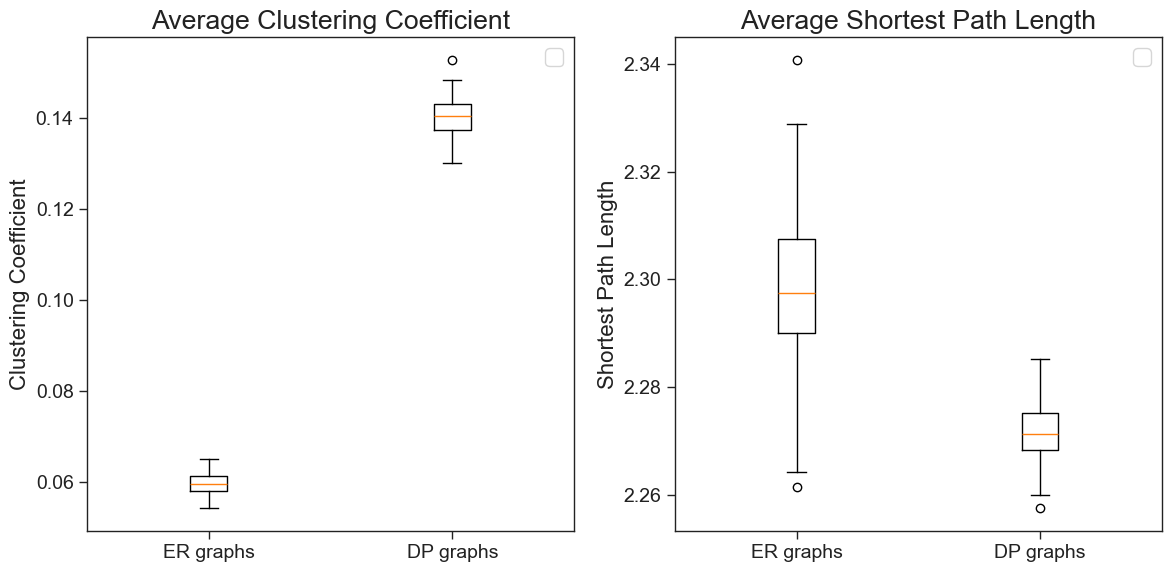

In [109]:
# These don't seem like the best choices for null models for the C. elegans network - which is okay!

clustering_data_combined = [er_avg_clustering_coefficients, dp_avg_clustering_coefficients]
path_data_combined = [er_avg_shortest_path_lengths, dp_avg_shortest_path_lengths]

# Create box plots for average clustering coefficient
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Box plot for average clustering coefficient
ax[0].boxplot(clustering_data_combined, labels=["ER graphs", "DP graphs"])
ax[0].set_title("Average Clustering Coefficient")
ax[0].set_ylabel("Clustering Coefficient")
ax[0].legend()

# Box plot for average shortest path length
ax[1].boxplot(path_data_combined, labels=["ER graphs", "DP graphs"])
ax[1].set_title("Average Shortest Path Length")
ax[1].set_ylabel("Shortest Path Length")
ax[1].legend()

# Show the plots
plt.tight_layout()
plt.show()

What can you say about clustering and path length in C. elegans now? (6 marks)

It's important to recognize that for this analysis, we are NOT considering the weights in the network. This is actually a pretty crucial talking point, considering that we are no longer effectively representing the C. elegans network as a "real" network, if we are not considering the strength of connections. 

_Average Clustering Coefficient_:
We know that the average clustering coefficient of a graph is a measure of how nodes tend to cluster together. Or in other words, what fraction of your neighbors are connected. We can think back to the social network example we did in class, that nodes tend to create tightly knit groups, where many people usually know each other. In real world networks, we know that average clustering is pretty high. 

Let's now consider the clustering coeffecients of ER and DP graphs, with relation to the actual C. elegans network! We can see that the average clustering coeffecient for DP and ER graphs are much lower than the actual value found for the C. elegans network. This leads to the conclusion that these randomly generated ER and DP networks might not be the best choice for null models if we want to provide similar networks to our real world C. elegans. However, this leads to another insight - the randomly generated graphs are NOT real world networks. They are instead an attempt to simulate networks for us to compare to. According to the textbook (see below reference), we expect random graphs to have decreasing clustering coeffecients as their size increases, whereas real-world graphs seem to be relatively indepenent. We can see that the C. elegans average clustering coeffecient is higher than both of our randomly generated set of samples. The average clustering coeffecient seems to match what intuitively makes more sense for a real-world network, which is expected. 

We can further posit that the real C. elegans networks might have tightly-knit communities, or hubs, corresponding to the large number of neurons at particular nodes, as well as strong connections, which makes sense for a nervous system. The analysis of clustering in the C. elegans (unweighted) network helps us with our intuition that there exists hubs or communities, where large number of synapses and connections live. However, when we consider weights, we will see that this might not be the exact representation of the real C. elegans network, so this analysis is taken in a vacuum. 

In the ER graph, we are placing the edges randomly, so the chance of high clustering is low. We shouldn't expect to see natural hubs or tight-communities in a graph that is generated simply by randomly placing edges, particularly when we aren't considering weights at all. This helps explain why the ER graphs have the lowest clustering coeffecients compared to the DPs and particularly to the C. elegans network. In the DP graphs, we are preserving the degree distribution of the real networks, but are swapping the edges in a way that can reduce clustering. We have no guarantee that edges that were connected to the original hubs of the C. elegans network are going to be preserved, so this further explains why these do not match well with the real-world network. However, due to the fact that we are preserving the degree distribution, it makes sense that the DP graphs are better related to the C. elegans network, in terms of average clustering. 

Furthermore, I have plotted the ER and DP graphs average clustering coeffecients independent of the actual data point, so we can see that we are getting reasonable data to begin with. We can see that although we are using two different methods, we are still producing null models with "relatively" similar clustering values. As discussed, it makes sense that there exists different clustering in these methods, based on the underlying methods used to create our graphs. Furthermore, we can see that we are generating decent networks, as we have relatively minimal error bars for both ER and DP, indicating that we are generating similar networks in our experiment to generate a random ensemble. 

_Average Path Lengths_:
In real world networks, we know that the path lengths are low. Considering the example from class, it is thought that any individual can make their way through social connections to find any other person in the world, using only 6 hops! Taking a look at our average shortest path lengths for both the ER and DP graphs, we can see that they are in fact, relatively similar to the actual value of the C. elegans network, but they are slightly lower! This makes intuitive sense for a few reasons. First, we are maintaining the number of nodes in our network, so network size is not inherently a factor. Secondly, we are not considering weights in this analysis, so although the real-world C. elegans has different weights for links in our network, if we switch to a binary approach, we can expect a network with the same number of nodes, and similar number of edges to be having a similar average path length. Finally, due to the fact that we are maintaining the degree of nodes in the DP swap, yet still obtaining a similar path length, we can postulate that the hubs in the C. elegans network are playing a major role in transmission of information, acting as central nodes that reduce the distance between external nodes. Again, this is not interpreting the weights as part of our analysis. We will see that when we consider the weights, the average path length actually increases, but not drastically. 


It's important to note, that although randomly generated graphs might not be similar to real-world graphs, they still give us an important baseline to compare real world graphs to, like we have shown here! We are not attempting to determine null models that mimic the C. elegans network, but instead are attempting to generate a baseline to compare real-world to generated.


Here is a textbook (more of an online repository) for network science, that I was using to help faciliate some research: https://networksciencebook.com/.

## Q3: Weighted metrics (45 marks)

Return to your original weighted graph. Both the average clustering coefficient and the average shortest path length generalize to weighted networks - calculate the average weighted clustering coefficient for the C. elegans network. (2 marks)

Hint: Networkx can use the weights if you instruct it to https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.cluster.clustering.html


In [110]:
# G has not been changed, so we should still be able to use that:

avg_weighted_clustering_coeff = nx.average_clustering(G, weight='weight')
avg_weighted_shortest_path = nx.average_shortest_path_length(G, weight='weight')


print(f"Average weighted clustering coeffecient: {avg_weighted_clustering_coeff}, Average weighted shortest path: {avg_weighted_shortest_path}")

Average weighted clustering coeffecient: 0.0288370640155851, Average weighted shortest path: 3.2125525386142697


As you move to consider the weighted average shortest path length, think about what you want the edge weights to mean - a greater weight means a greater number of synapses, and therefore a stronger connection. You will need to choose an appropriate method to invert the edge weights. Implement such an inversion, and then calculate the weighted average shortest path length. (10 marks)

In [111]:
import copy
IW_G = copy.deepcopy(G) # new graph to be inverted

print(f"Weighted average shortest path length BEFORE inversion: {nx.average_shortest_path_length(IW_G, weight='weight')}") # NEEDED TO SPECIFY WEIGHTS!!!
# Get the max weight in the real network
max_weight = 0
for u, v, d in IW_G.edges(data=True):
    if d['weight'] > max_weight:
        max_weight = d['weight']

print(max_weight)
for u, v, d in IW_G.edges(data=True):
    
    # d['weight'] = 1 / d['weight']
    d['weight'] = max_weight - d['weight'] + 1 # suitable coeff? 
    

# for u, v, d in IW_G.edges(data=True):
#     print(d)
# print(IW_G[0]) # verify
# for u, v, d in IW_G.edges(data=True):
#     d['weight'] = 1 / d['weight'] # inversion

c_elegans_weighted_inverse_shortest_path_length = nx.average_shortest_path_length(IW_G, weight='weight')

print(f"Weighted average shortest path length AFTER inversion: {nx.average_shortest_path_length(IW_G, weight='weight')}") # NEEDED TO SPECIFY WEIGHTS!!!

Weighted average shortest path length BEFORE inversion: 3.2125525386142697
37
Weighted average shortest path length AFTER inversion: 79.77839663752869


What do these numbers mean? Just as with the binary metrics, you now need to compare to a reference system. Again use two null models. For the first, implement a degree preserving double edge swap randomization (don't worry but do note that this does not preserve strength). For the second, fix the edges where they are and randomly shuffle the weights. (15 marks)

__A note on edge weights for our generated graphs__: 

Double edge swaps do not preserve the original weights, because the algorithm wouldn't know how you want it to do it. Since we need to compare against our actual C. elegans network as well as the random shuffling, we need to decide a way to weight our network after we perform the double swap. I have elected to store the original weights from the C. elegans network, perform the double swap, randomly shuffle the weights, and then apply them back to the graph, post double swap. I am not sure if this is the best way to do this, but it seems to provide decent comparable graphs for our double swap method. It also gives the added benefit of a similar weight approach for the second approach, where we will fix our edges. 

In [112]:
# First, let's do another DP swap

import copy

# Networkx has a `double_edge_swap` method, that swaps two edges in the graph while keeping (preserving) the node degrees
# https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.swap.double_edge_swap.html

double_swap_graphs_inverted = []
double_swap_graphs = []


# Generate 100 graphs
for i in range(100):
    # 1. copy the graph, get the edge weights
    graph = copy.deepcopy(G)
    
    edge_weights = {(u, v): d['weight'] for u, v, d in graph.edges(data=True)}
    
    original_graph_weights = list(edge_weights.values())
    
    # 2. perform a double edge swap
    graph = nx.double_edge_swap(graph, nswap=graph.number_of_edges() * 20, max_tries= graph.number_of_edges() * 200)
    
    # 3. shuffle the weights, add them back
    random.shuffle(original_graph_weights)
    for i, (u, v) in enumerate(graph.edges()):
        graph[u][v]['weight'] = original_graph_weights[i]
    
    # 4. Append to list
    double_swap_graphs.append(graph)
    


# Same collection and analysis as above
weighted_average_clustering_coeff_double_swap = []
weighted_average_shortest_path_double_swap = []


for g in double_swap_graphs:
    weighted_average_clustering_coeff_double_swap.append(nx.average_clustering(g, weight='weight'))
    

# Next, invert the weights!
for g in double_swap_graphs:
    max_weight = 0
    for u, v, d in g.edges(data=True):
        if d['weight'] > max_weight:
            max_weight = d['weight']

    for u, v, d in g.edges(data=True):
        
        # d['weight'] = 1 / d['weight']
        d['weight'] = max_weight - d['weight'] + 1 # suitable coeff? 
    # We now have our inverse-weighted graphs
    if nx.is_connected(g):
        weighted_average_shortest_path_double_swap.append(nx.average_shortest_path_length(g, weight='weight'))
        



# # avg_clustering_coefficients
# print(weighted_average_clustering_coeff_double_swap)
# print(weighted_average_shortest_path_double_swap)    





__Selection of weight inversal__

I have decided on the inversion method of C - current_weight, with C being the max weight present in the real network. This allows inversion, as we will have edges with the highest weights switched to closer to the minimum, and edges with lower weights being closer to the max weight. This seems intuitive, as we theoretically should preserve distance, because we are subtracting from the real max weight present in the network. We know that a greater weight means a greater number of synapses, and therefore a stronger connection. Therefore, our expected behaviour is: nodes connected via edges with smaller weights would have stronger influence than those with larger weights, after our inversion. 


In [113]:
# Second, let's do a random shuffle.

import random

# First, let's implement a degree preserving double edge swap randomization
# DP_RAND_G = nx.double_edge_swap(IW_G, nswap=1, max_tries=100, seed=123)
shuffled_graphs = []
for i in range(100):
    
# SUPER IMPORTANT TO DEEP COPY THIS WAY: https://networkx.org/documentation/stable/reference/classes/generated/networkx.Graph.copy.html
# DP_RAND_G = copy.deepcopy(IW_G) # DP, double edge swap randomization
    FE_SW_G = copy.deepcopy(G) # Fixed Edges, swapped weights
    original_weights = []
    
    for u, v, d in FE_SW_G.edges(data=True):
        original_weights.append(d['weight'])
    
    # Ensure proper shuffling, by shuffling 100 times for each graph (should be random enough?)
    for i in range(100): 
        random.shuffle(original_weights)
    for idx, (u, v) in enumerate(FE_SW_G.edges()):
        FE_SW_G.edges[u, v]['weight'] = original_weights[idx]
        
    shuffled_graphs.append(FE_SW_G)
    

weighted_average_clustering_coeff_shuffled = []
weighted_average_shortest_path_shuffled = []



for g in shuffled_graphs:
    # if nx.is_connected(graph):
    #     weighted_average_shortest_path_shuffled.append(nx.average_shortest_path_length(graph, weight='weight')) # need to specify weights
    
    weighted_average_clustering_coeff_shuffled.append(nx.average_clustering(g, weight='weight')) # need to specify weights

for g in shuffled_graphs:
    max_weight = 0
    for u, v, d in g.edges(data=True):
        if d['weight'] > max_weight:
            max_weight = d['weight']

    for u, v, d in g.edges(data=True):
        
        # d['weight'] = 1 / d['weight']
        d['weight'] = max_weight - d['weight'] + 1 # suitable coeff? 
        
    
    if nx.is_connected(g):
        weighted_average_shortest_path_shuffled.append(nx.average_shortest_path_length(g, weight='weight'))
        


# print(weighted_average_clustering_coeff_shuffled)
# print(weighted_average_shortest_path_shuffled)



Create similar boxplots as in Q2, one for the weighted average clustering coefficient and one for the weighted average shortest path. (10 marks)

C:\Users\mattm\AppData\Local\Temp\ipykernel_31660\2166632870.py:10: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax[0].boxplot([weighted_average_clustering_coeff_shuffled, weighted_average_clustering_coeff_double_swap], labels=["Shuffle graphs", "DP-Swap graphs"])
C:\Users\mattm\AppData\Local\Temp\ipykernel_31660\2166632870.py:18: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax[1].boxplot([weighted_average_shortest_path_shuffled, weighted_average_shortest_path_double_swap], labels=["Shuffle graphs", "DP-Swap graphs"])


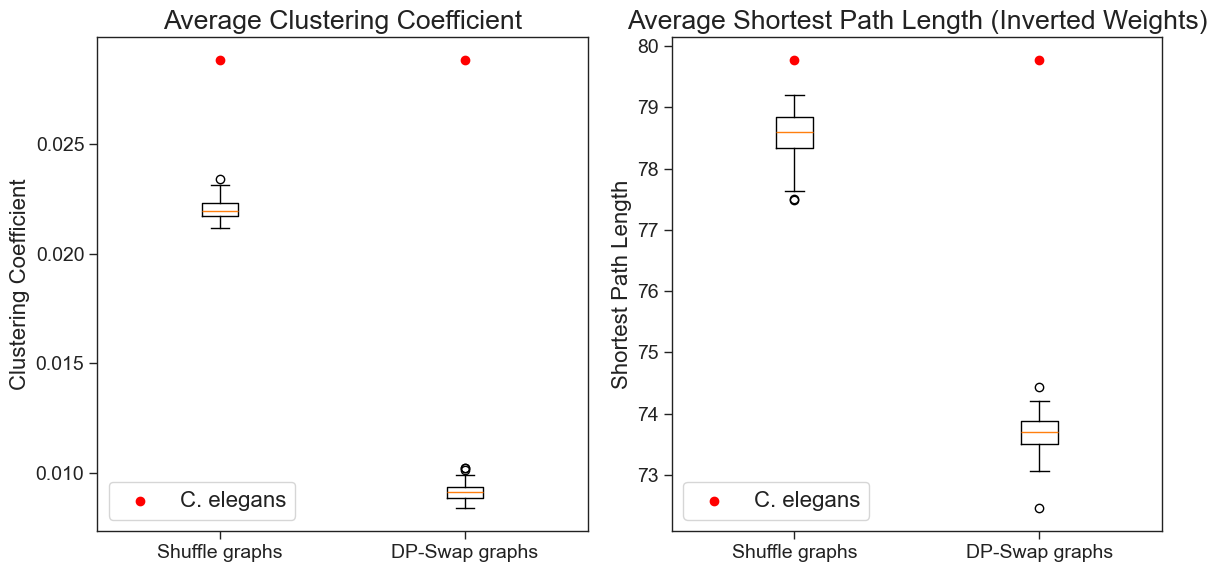

In [114]:
# First, average clustering and path length for the REAL values in C. elegans (going to be one data point, let's plot as a scatter)
real_clustering = nx.average_clustering(G, weight='weight')
real_path_length = nx.average_shortest_path_length(IW_G, weight='weight')


# Create box plots for average clustering coefficient
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Box plot for average clustering coefficient
ax[0].boxplot([weighted_average_clustering_coeff_shuffled, weighted_average_clustering_coeff_double_swap], labels=["Shuffle graphs", "DP-Swap graphs"])
ax[0].scatter(1, real_clustering, color='red', label='C. elegans', zorder=3)
ax[0].scatter(2, real_clustering, color='red', zorder=3)
ax[0].set_title("Average Clustering Coefficient")
ax[0].set_ylabel("Clustering Coefficient")
ax[0].legend()
# ax[0].set_ylim(0.475, 0.525)
# Box plot for average shortest path length
ax[1].boxplot([weighted_average_shortest_path_shuffled, weighted_average_shortest_path_double_swap], labels=["Shuffle graphs", "DP-Swap graphs"])
ax[1].scatter(1, c_elegans_weighted_inverse_shortest_path_length, color='red', label='C. elegans', zorder=3)
ax[1].scatter(2, c_elegans_weighted_inverse_shortest_path_length, color='red', zorder=3)
ax[1].set_title("Average Shortest Path Length (Inverted Weights)")
ax[1].set_ylabel("Shortest Path Length")
ax[1].legend()

# Show the plots
plt.tight_layout()
plt.show()

Interpret your findings - what can you say about weighted clustering and weighted average shortest path in C. elegans? (8 marks)

__Weighted Clustering in C. elegans__:

When we computed the actual weighted clustering of the C. elegans network, we can see actually relatively lower, when we consider weights. This makes sense that the network has a lower clustering coeffecient, as different edges now have costs associated with moving around. These findings are relatively different for when we were considering the C. elegans network as an unweighted graph. This means that the weights are actually playing a large role in our network, in a few primary ways. First, it indicates that we have sparse or weakly connected local neighbourhoods. Since we know that the weighted clustering measures how "connected" a node's region is, the nodes in the network seem to have fewer or weaker connections than we originally hypothesized. Second, the weighted clustering not only takes into account the existence of connections, but also the strength of these connections. A lower value like we see here indicates that even when local clusters exist, the connections are not guaranteed to be particularly strong. In general, when we consider the weights of the C. elegans network, in terms of average clustering, we can see that the C. elegans network seems relatively less tightly connected than we originally considered. However, we can still posit that there exists some clustering in the network, meaning that there are important information hubs, but the number or presence of these might be less apparent than we originally thought. With the lack of clustering, we can posit that the C. elegans network prefers to use key direct connections to transfer information. Furthermore, we might expect our average shortest path to increase, as we seem to have less clustering than we originally considered. 

However, this does not inherently mean negative connotations. Initially, it might seem that if we have this type of clustering, then our network might not have the best setup for information transfer. What it could mean instead, is that the synapses present in the C. elegans network need to work together to process information, and it is not entirely controlled by a small set of neurons that are "running the show". Or, that they use key direct routes to process information, rather than a redundant network. 

If we compare our findings with the fixed-edge shuffle and the DP-swap graphs, we can see that these random graphs have lower clustering coeffecients. This makes intutive sense, as we are fundamentally altering the data in the C. elegans network, in a way to create randomly generated graphs to comapre to. However, we can see that we have relatively low average clustering in both sets of our generated graphs, which means that in terms of clustering coeffecients, our randomly generated graphs and our C. elegans network seem to be more closely related than when we compared without weights. We can see that the fixed-edge shuffle seems to be more closely related to the C. elegans network, as we are maintaining the edges and just messing with the weights, which again is intuitive. Furthermore, when we analyze the DP-swaps, we expect them to have a more different clustering coeffecient, as we are changing both the edges and the weights. These random models seem to be decent choices for compareable graphs, however, they are based on the original C. elegans network, so we would expec them to be relatively compareable!

__Weighted average shortest path in C. elegans__:

Since we know that higher weights mean a stronger connection, and considering what we have learned about the clustering of the C. elegans network, we would expect to see an increase in the shortest path length when we consider the weighted network. Comparing the average shortest path length in the unweighted vs weighted networks, we can see that we do in fact see an increase in average shortest path length. This makes sense, as we already posited that the connections in terms of clsutering between synapses in the C. elegans network were relatively weak, but we might expect to see some clustering and potential hubs. It's important to notice that we see a profound increase in the average path length, when we invert the weights for analysis. This makes sense, as our inversion converts our weights to represent their actual meaning, rather than a distance metric that our pathfinding algorithm might care about. 

In terms of the average shortest path length, the algorithm treats the weights as a distance, so it tends to find inefficient routes in our actual network, but instead finds paths with low weights. But, we know that in the C. elegans network, higher weights actually represent stronger connections, so these initial path weight values do not tell us much. If we invert the weights, we can see higher numbers in terms of "average shortest path length", but really what this is telling us is that the network has strong connections. Comparing this to our negation of weights in our above analysis, we can see that the average shortest path length without weights, or their corresponding inversion, can actually be quite misleading, as we are negating key information that is encoded in the weights. It's quite the thing to wrap your head around in terms of standard network or graph analysis, as we would expect low weights to be efficient paths, but for our system, that's not the case - it is actually the opposite. Higher weights mean higher connectivity strength. 

If we compare our findings with the fixed-edge shuffle, and the DP-swap graphs, we can see that these graphs have similar, but still drastically higher average shortest paths after inverting the weights. Although the DP-swap graphs are a little bit farther off than the C. elegans network, they seem to all be relatively similar, allowing us to be confident in our selection of our compareable graphs. We can see that the fixed-edge shuffle seems to be a little more closely related to the C. elegans network, as we are maintaing the edges and messing with the weights. Furthermore, we can say that we expect the DP-swaps to have a more different average shortest path length, as we are pertrubing both the edges and the weights. 



__What can we say about C. elegans in general, when considering the weights in the network?__

We can posit that the neurons in the C. elegans network are organized in such a way that they don't form global clusters, however taking into account our connectivity regarding our new analysis on shortest path length, we can see strong connections between synapses in our network. When we have a relatively low clustering coeffecient like we see here, there are few alternative paths for communication to take place, hinting towards key direct routes, rather than global clusters. 

In the C. elegans network, the lower clustering points to the idea that it operates efficiently due to strong connections between neurons that faciliate direct communication. This is readily apparent as when we invert the weights, we can see a large increase in the "average shortest path length", which we now know means the strength of connectivity, as our weights are not a cost to travel, but rather the strength of synapse connection. 

In general, this tells us that although we might not have a high-level of clustering in our network, we can see strong connections between synapses, likely with key direct routes that facilitate information. 